In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../../DataSets/mnist_train.csv')
data = df.values
print data.shape

(17596, 785)


In [3]:
labels = data[:3000, 0]
features = data[:3000, 1:]
print labels.shape, features.shape
print np.unique( labels )
labels =  np_utils.to_categorical(labels)
print labels.shape

(3000,) (3000, 784)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
(3000, 10)


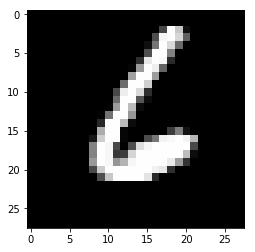

In [4]:
n = np.random.choice( features.shape[0] )
img = features[n].reshape( (28,28) )
plt.imshow( img, cmap='gray' )
plt.show()

In [5]:
split = int( 0.8*( features.shape[0] ) )
train_features = features[ :split ]/255.0
train_labels = labels[ :split ]
test_features = features[ split: ]/255.0
test_labels = labels[ split: ]

print train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

(2400, 784) (2400, 10) (600, 784) (600, 10)


In [6]:
model = Sequential()

In [7]:
model.add( Dense( 128, input_shape = (784,) ) )
model.add( Activation('relu') )


model.add( Dense( 10 ) )
model.add( Activation('softmax') )

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1290        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
___________________

In [8]:
model.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [9]:
model.fit( train_features, train_labels, batch_size=15, nb_epoch=20, validation_data=( test_features, test_labels )  )

Train on 2400 samples, validate on 600 samples
Epoch 1/20
2400/2400 [==============================] - 1s - loss: 0.8059 - acc: 0.7754 - val_loss: 0.4230 - val_acc: 0.8783
Epoch 2/20
2400/2400 [==============================] - 0s - loss: 0.3262 - acc: 0.9071 - val_loss: 0.3547 - val_acc: 0.8967
Epoch 3/20
2400/2400 [==============================] - 0s - loss: 0.2357 - acc: 0.9363 - val_loss: 0.3102 - val_acc: 0.9100
Epoch 4/20
2400/2400 [==============================] - 0s - loss: 0.1740 - acc: 0.9563 - val_loss: 0.2990 - val_acc: 0.9217
Epoch 5/20
2400/2400 [==============================] - 0s - loss: 0.1351 - acc: 0.9675 - val_loss: 0.2920 - val_acc: 0.9100
Epoch 6/20
2400/2400 [==============================] - 0s - loss: 0.1006 - acc: 0.9767 - val_loss: 0.2680 - val_acc: 0.9233
Epoch 7/20
2400/2400 [==============================] - 0s - loss: 0.0844 - acc: 0.9829 - val_loss: 0.2654 - val_acc: 0.9267
Epoch 8/20
2400/2400 [==============================] - 0s - loss: 0.0587 - ac

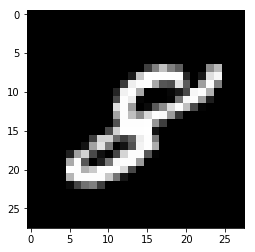

In [10]:
n = np.random.choice( features.shape[0] )
img = features[n].reshape( (28,28) )
plt.imshow( img, cmap='gray' )
plt.show()


In [11]:
predict_image = features[n].reshape( (-1,1) )
predict_image = predict_image.T/255.0
res = model.predict( predict_image, batch_size=15 )
max_ind = res.argmax()
print "Predicted Value is", max_ind, "with confidence", 100*res[0][max_ind]
print "Real Value is ", int(data[n][0])

Predicted Value is 8 with confidence 99.8290002346
Real Value is  8


In [12]:
#model.save( 'Digit_Recognition_Model.h5' )